<a href="https://colab.research.google.com/github/Vanlimp/WoMakersCode_DataAnalytics_DesafiosIndividuais/blob/main/Desafio3_Estat%C3%ADstica_Probabilidade__Amostragem_Vanessa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estatística - Probabilidade e Amostragem Desafio Final

Você é uma pesquisadora desenvolvendo uma análise sobre as características
da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:


In [28]:

# Importando todas as bibliotecas utilizadas no desafio:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística e testes de hipóteses
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.stats.api as sms



In [3]:
url = 'https://raw.githubusercontent.com/Vanlimp/WoMakersCode_DataAnalytics_DesafiosIndividuais/refs/heads/main/populacao_brasileira.csv'

df = pd.read_csv(url)

df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa
aleatória e ela não ser fluente em inglês. Considere fluente quem tem o
nível avançado.


In [4]:
# Contar o total de pessoas
total_pessoas = len(df)

# Contar o número de pessoas fluentes (nível avançado)
fluentes = len(df[df['nível de proficiência em inglês'] == 'Avançado'])

# Calcular a probabilidade complementar
prob_nao_fluente = 1 - (fluentes / total_pessoas)

print(f'Probabilidade complementar (não fluente): {prob_nao_fluente:.2%}')


Probabilidade complementar (não fluente): 65.60%


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual
é a probabilidade de ela ter uma renda superior a 5 mil reais?


In [5]:
#Quantas linhas e colunas tem o dataset?

# Exibe o número de linhas e colunas.
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de Colunas: {df.shape[1]}")

Número de linhas: 1000
Número de Colunas: 7


In [6]:
#Quais são os tipos das variáveis e se há valores ausentes?

# Exibir tipos de dados de cada coluna
print(df.dtypes)

# Verifique se há valores ausentes
print(df.isnull().sum())

Unnamed: 0                           int64
estado                              object
idade                                int64
escolaridade                        object
nível de proficiência em inglês     object
renda                              float64
sexo                                object
dtype: object
Unnamed: 0                         0
estado                             0
idade                              0
escolaridade                       0
nível de proficiência em inglês    0
renda                              0
sexo                               0
dtype: int64


In [19]:
# Lista das siglas dos estados brasileiros
estados_validos = [
    "AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO", "MA", "MT",
    "MS", "MG", "PA", "PB", "PR", "PE", "PI", "RJ", "RN", "RS", "RO",
    "RR", "SC", "SP", "SE", "TO"
]

# Manter apenas os valores que estão na lista de estados válidos
df['estado'] = df['estado'].apply(lambda x: x if x in estados_validos else 'Desconhecido')

# Verificar os valores únicos após a limpeza
print(df['estado'].unique())


['MA' 'BA' 'AM' 'CE' 'SE' 'DF' 'PI' 'AP' 'AC' 'SC' 'SP' 'GO' 'RO' 'PA'
 'MS' 'RN' 'RS' 'RR' 'PR' 'MG' 'MT' 'TO' 'PB' 'PE' 'RJ' 'AL' 'ES']


In [20]:
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [21]:
# Filtrar pessoas de Alagoas (AL) ou Pará (PA)
df_al_pa = df[df['estado'].isin(['AL', 'PA'])]

# Contar o total de pessoas desses estados
total_al_pa = len(df_al_pa)

# Contar quantas têm renda superior a 5 mil
renda_superior_5k = len(df_al_pa[df_al_pa['renda'] > 5000])

# Calcular a probabilidade dividindo as pessoas com renda superior a 5 mil pelo total de pessoas desses estados.
prob_renda_superior_5k = renda_superior_5k / total_al_pa if total_al_pa > 0 else 0

print(f'Probabilidade de ter renda superior a 5 mil: {prob_renda_superior_5k:.2%}')


Probabilidade de ter renda superior a 5 mil: 5.06%


3. Descubra a probabilidade de uma pessoa, residente no estado do
Amazonas, ter ensino superior completo (considerando apenas a
escolaridade classificada como 'Superior'). Qual a probabilidade da quinta
pessoa amazonense que você conversar ter ensino superior completo?

In [22]:

# Filtrar apenas pessoas do Amazonas (AM)
df_am = df[df['estado'] == 'AM']

# Contar o total de pessoas do Amazonas
total_am = len(df_am)

# Contar quantas têm ensino superior completo
superior_am = len(df_am[df_am['escolaridade'] == 'Superior'])

# Calcular a probabilidade
prob_superior_am = superior_am / total_am if total_am > 0 else 0

print(f'Probabilidade de uma pessoa do Amazonas ter ensino superior completo: {prob_superior_am:.2%}')


Probabilidade de uma pessoa do Amazonas ter ensino superior completo: 23.68%


In [23]:
# Cálculo da probabilidade da quinta pessoa amazonense ter ensino superior completo
prob_quinta_pessoa = ((1 - prob_superior_am) ** 4) * prob_superior_am

print(f'Probabilidade da quinta pessoa amazonense que você conversar ter ensino superior completo: {prob_quinta_pessoa:.2%}')


Probabilidade da quinta pessoa amazonense que você conversar ter ensino superior completo: 8.03%


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?


In [24]:
# Criar faixas de renda de 1.500 em 1.500
df['faixa_renda'] = pd.cut(df['renda'], bins=np.arange(0, df['renda'].max() + 1500, 1500))

# Contar quantas pessoas estão em cada faixa
faixa_mais_comum = df['faixa_renda'].value_counts().idxmax()

print(f'A faixa de renda mais comum é: {faixa_mais_comum}')


A faixa de renda mais comum é: (3000.0, 4500.0]


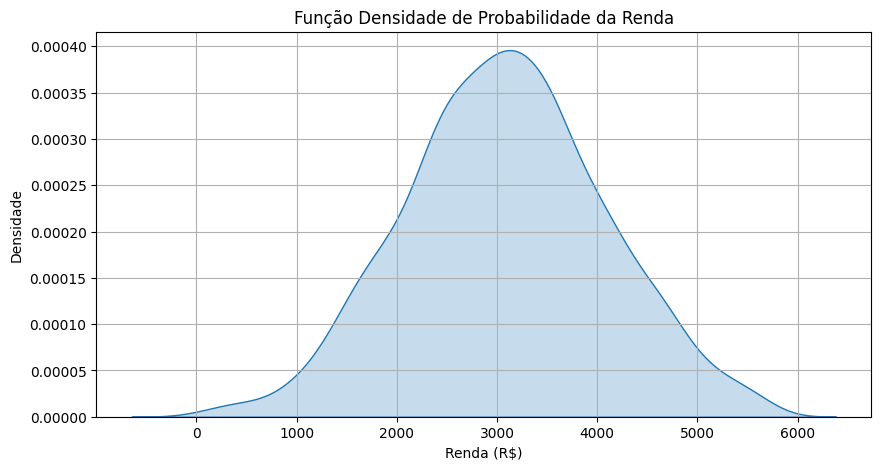

In [25]:
# Plotando a Função Densidade de Probabilidade (PDF)
plt.figure(figsize=(10,5))
sns.kdeplot(df['renda'], fill=True, bw_adjust=1)

plt.xlabel('Renda (R$)')
plt.ylabel('Densidade')
plt.title('Função Densidade de Probabilidade da Renda')
plt.grid(True)
plt.show()

5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.


In [26]:
# Calcular média e variância da renda
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

print(f'Média da renda: R$ {media_renda:.2f}')
print(f'Variância da renda: {variancia_renda:.2f}')


Média da renda: R$ 3082.54
Variância da renda: 993156.23


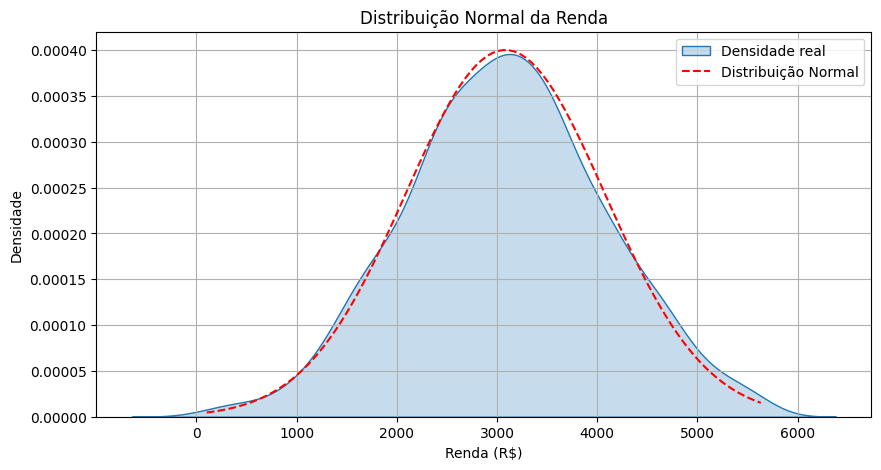

In [29]:
# Calcular desvio padrão
desvio_padrao_renda = np.sqrt(variancia_renda)

# Criar valores para o eixo X (renda)
x = np.linspace(df['renda'].min(), df['renda'].max(), 100)

# Criar a distribuição normal teórica
pdf = norm.pdf(x, media_renda, desvio_padrao_renda)

# Criar o gráfico
plt.figure(figsize=(10,5))

# Plotar a densidade real da renda
sns.kdeplot(df['renda'], fill=True, label='Densidade real')

# Plotar a distribuição normal teórica
plt.plot(x, pdf, label='Distribuição Normal', color='red', linestyle='dashed')

# Ajustes do gráfico
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade')
plt.title('Distribuição Normal da Renda')
plt.legend()
plt.grid(True)
plt.show()


6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra de
população brasileira com 1 milhão de habitantes, qual a probabilidade de
encontrarmos 243 mil pessoas com pós-graduação?

In [30]:

from scipy.stats import binom

# Calcular a proporção de pessoas com pós-graduação na amostra
p = len(df[df['escolaridade'] == 'Pós-Graduação']) / len(df)

# Definir os valores do problema
n = 1_000_000  # População de 1 milhão
k = 243_000  # Queremos encontrar 243 mil pessoas com pós-graduação

# Calcular a probabilidade usando a distribuição binomial
prob = binom.pmf(k, n, p)

print(f'Probabilidade de encontrar exatamente 243 mil pessoas com pós-graduação: {prob:.10f}')


Probabilidade de encontrar exatamente 243 mil pessoas com pós-graduação: 0.0000000000


In [31]:
from scipy.stats import binom

# Probabilidade de pelo menos 243 mil pessoas com pós-graduação
prob_acumulada = 1 - binom.cdf(242999, 1_000_000, p)

print(f'Probabilidade de encontrar pelo menos 243 mil pessoas com pós-graduação: {prob_acumulada:.10f}')


Probabilidade de encontrar pelo menos 243 mil pessoas com pós-graduação: 0.0000000000


In [32]:
# Calcular o valor esperado
valor_esperado = 1_000_000 * p

print(f'Valor esperado de pessoas com pós-graduação: {valor_esperado:.0f}')


Valor esperado de pessoas com pós-graduação: 0


In [33]:

# Calcular média e desvio padrão da distribuição normal aproximada
media = 1_000_000 * p
desvio_padrao = np.sqrt(1_000_000 * p * (1 - p))

# Calcular o Z-score para 243.000
z = (243_000 - media) / desvio_padrao

# Probabilidade acumulada (P(X >= 243.000))
prob_pelo_menos_243k = 1 - norm.cdf(z)

print(f'Probabilidade aproximada de encontrar pelo menos 243 mil pessoas com pós-graduação: {prob_pelo_menos_243k:.10f}')


Probabilidade aproximada de encontrar pelo menos 243 mil pessoas com pós-graduação: 0.0000000000


<ipython-input-33-d8069d12d455>:6: RuntimeWarning: divide by zero encountered in scalar divide
  z = (243_000 - media) / desvio_padrao
